In [2]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve

In [3]:
@np.vectorize
def K(k, x0=0.5*np.pi, a=1, U0b=4, **kwarg):
    return fsolve(lambda x: U0b/(2*x) * np.sin(x*a) + np.cos(x*a) - np.cos(k*a), x0)

In [4]:
K(np.pi, x0=2*np.pi)

array([9.42477796])

In [5]:
k = np.linspace(-np.pi, np.pi, 100)
Ks = np.array([K(i) for i in k])
Ks2 = np.array([K(i, 1.5*np.pi) for i in k])
Ks3 = np.array([K(i, 2.5*np.pi) for i in k])

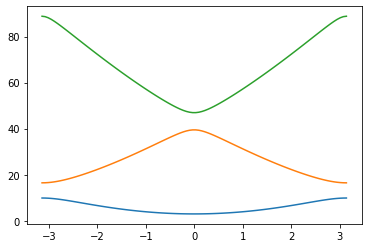

In [6]:
plt.plot(k, Ks**2)
plt.plot(k, Ks2**2)
plt.plot(k, Ks3**2)

In [7]:
def getBands(n, **kwarg):
    if "a" in kwarg.keys():
        a = kwarg["a"]
    else:
        a = 1
    k = np.linspace(-np.pi/a, np.pi/a, 100)
    Ks = []
    for i in range(n):
        Ks.append(K(k, (i+0.5)*np.pi/a, **kwarg))
    return Ks

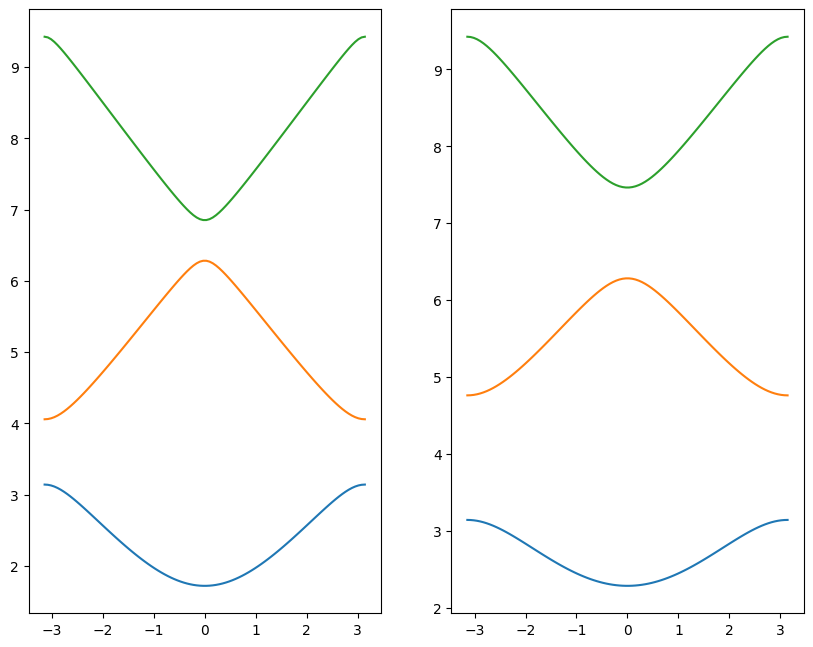

In [8]:
bands = getBands(3)
fig, axs = plt.subplots(1,2,figsize = (10, 8), dpi = 100)
for band in bands:
    axs[0].plot(k, band)

bands = getBands(3, U0b = 10)
for band in bands:
    axs[1].plot(k, band)